# Data Science for Public Good
## Zoo Station: Job Automation
### Summary of Variables

- "full_dataset": the entire comma-separated array, loaded into a Pandas dataframe and with its columns separated into the following objects
- "occupation": strings defining each job we are considering
- "education": strings describing the education level associated with each occupation
- "n_employed": integers representing the number of people employed in each occupation (May 2016)
- "average_annual_wage": float values for the average annual wage earned by workers in each occupation
- "median_annual_wage": float values for the median annual wage earned by workers in each occupation
- "prob_automation": float values between 0 and 1 representing the probability of a given occupation becoming automated

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load in the data using `pandas`

In [2]:
full_dataset = pd.read_csv('prob_job_automation.csv',delimiter=',')

#### Visualize the `pandas` dataframe

In [3]:
full_dataset

,_ - rank,_ - code,prob,Average annual wage,education,occupation,short occupation,len,probability,numbEmployed,median_ann_wage,employed_may2016,average_ann_wage
0,624,51-4033,0.9500,34920.0,High school diploma or equivalent,"Grinding, Lapping, Polishing and Buffing Machi...","Tool setters, operators and tenders",35,0.9500,74600,32890.0,74600,34920.0
1,517,51-9012,0.8800,41450.0,High school diploma or equivalent,"Separating, Filtering, Clarifying, Precipitati...","Tool setters, operators and tenders",35,0.8800,47160,38360.0,47160,41450.0
2,484,41-4012,0.8500,68410.0,High school diploma or equivalent,"Sales Representatives, Wholesale and Manufactu...","Sales Representatives, Wholesale and Manufactu...",92,0.8500,1404050,57140.0,1404050,68410.0
3,105,53-1031,0.0290,59800.0,High school diploma or equivalent,First-Line Supervisors of Transportation and M...,Supervisors Transportation,26,0.0290,202760,57270.0,202760,59800.0
4,620,51-4072,0.9500,32660.0,High school diploma or equivalent,"Molding, Coremaking and Casting Machine Setter...","Molding, Coremaking and Casting Machine Setter...",89,0.9500,145560,30480.0,145560,32660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,259,27-2011,0.3700,71313.6,"Some college, no degree",Actors,Actors,6,0.3700,48620,33473.0,48620,71313.6
698,522,51-3011,0.8900,27110.0,No formal educational credential,Bakers,Bakers,6,0.8900,180450,25090.0,180450,27110.0
699,42,21-2011,0.0081,49450.0,Bachelor's degree,Clergy,Clergy,6,0.0081,49320,45740.0,49320,49450.0
700,669,41-9012,0.9800,36560.0,No formal educational credential,Models,Models,6,0.9800,4390,21870.0,4390,36560.0


#### Sort the data from most likely to be automated to least

In [4]:
sorted_full_dataset = full_dataset.sort_values('prob',ascending=False,inplace=False)
sorted_full_dataset

,_ - rank,_ - code,prob,Average annual wage,education,occupation,short occupation,len,probability,numbEmployed,median_ann_wage,employed_may2016,average_ann_wage
628,697,49-9064,0.9900,39720.0,High school diploma or equivalent,Watch Repairers,Watch Repairers,15,0.9900,1620,36740.0,1620,39720.0
534,692,25-4031,0.9900,34780.0,Postsecondary nondegree award,Library Technicians,Library Technicians,19,0.9900,93410,32890.0,93410,34780.0
69,694,51-9151,0.9900,31740.0,High school diploma or equivalent,Photographic Process Workers and Processing Ma...,Photographic Process Workers and Processing Ma...,61,0.9900,26430,26470.0,26430,31740.0
541,693,43-4141,0.9900,36480.0,High school diploma or equivalent,New Accounts Clerks,New Accounts Clerks,19,0.9900,41630,34990.0,41630,36480.0
209,701,23-2093,0.9900,51490.0,High school diploma or equivalent,"Title Examiners, Abstractors and Searchers","Title Examiners, Abstractors and Searchers",42,0.9900,54560,45800.0,54560,51490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,5,29-1181,0.0033,79290.0,Doctoral or professional degree,Audiologists,Audiologists,12,0.0033,12310,75980.0,12310,79290.0
148,4,21-1023,0.0031,47880.0,Bachelor's degree,Mental Health and Substance Abuse Social Workers,Mental Health and Substance Abuse Social Workers,48,0.0031,114040,42700.0,114040,47880.0
66,2,49-1011,0.0030,66730.0,High school diploma or equivalent,"First-Line Supervisors of Mechanics, Installer...","First-Line Supervisors of Mechanics, Installer...",61,0.0030,453330,63540.0,453330,66730.0
359,3,11-9161,0.0030,78060.0,Bachelor's degree,Emergency Management Directors,Emergency Management Directors,30,0.0030,9570,70500.0,9570,78060.0


In [5]:
import random

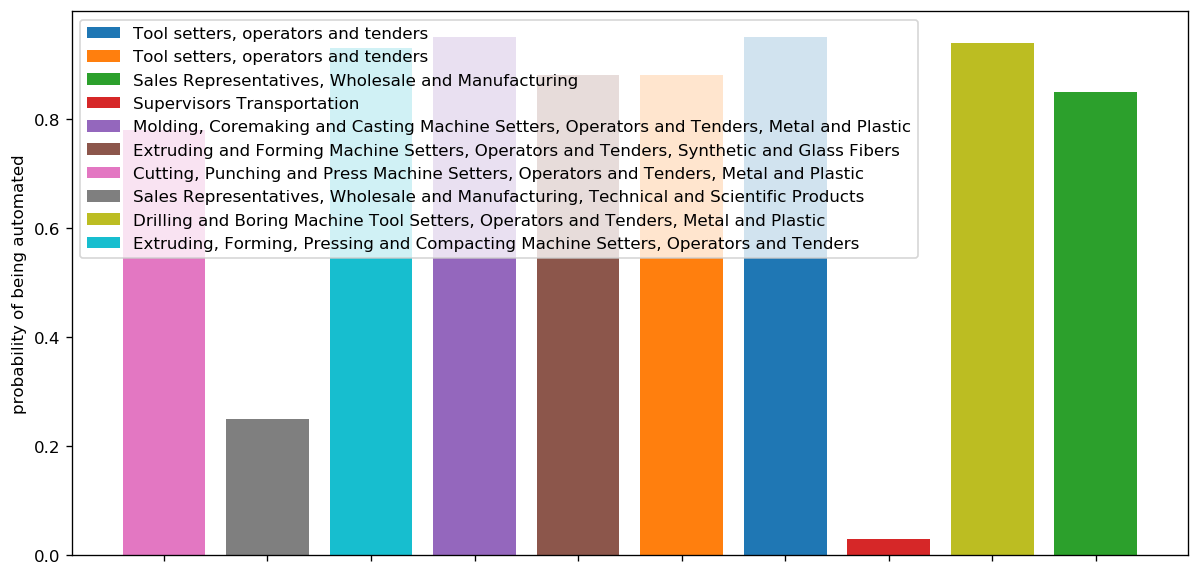

In [19]:
## make a bar chart

ys = full_dataset.iloc[:10]['prob']
xs = np.arange(len(ys)) ## dummy x values
random.shuffle(xs) ## make it extra hard to read the plot
xlabels = full_dataset.iloc[:10]['short occupation'].values
for i,(x,y,label) in enumerate(zip(xs,ys,xlabels)):
    plt.bar(x,y,color='C%d'%i,label=label)

## set axis labels, etc.
ax = plt.gca()
ax.set_xticks(xs)
ax.set_xticklabels([])
#ax.set_xticklabels(xlabels,rotation=-90)
ax.set_ylabel('probability of being automated')
ax.legend()
## resize figure for visibility
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.set_dpi(120)

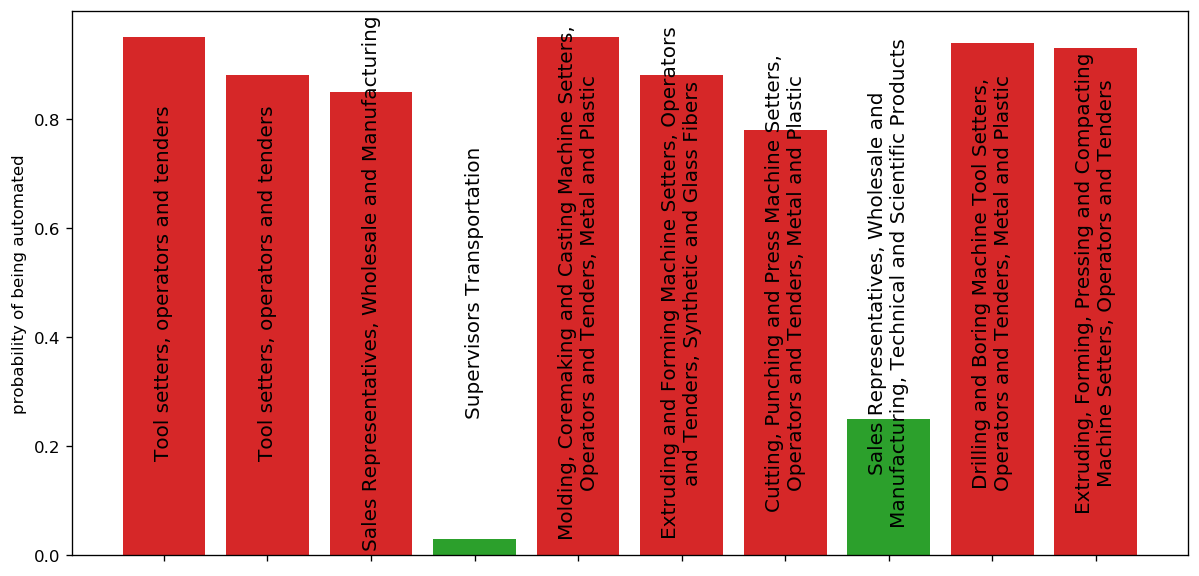

In [7]:
## make a bar chart

ys = full_dataset.iloc[:10]['prob']
xs = np.arange(len(ys)) ## dummy x values
xlabels = full_dataset.iloc[:10]['short occupation'].values
for i,(x,y,label) in enumerate(zip(xs,ys,xlabels)):
    color = 'C2' if y < 0.5 else 'C3'
    plt.bar(x,y,color=color,label=label)
    
    ## if a label is too long, add a line break to the middle
    if len(label) > 50:
        label = label.split(' ')
        label = ' '.join(label[:int(len(label)/2)]) + '\n' + ' '.join(label[int(len(label)/2):]) 
    plt.text(x,0.5,label,rotation=90,ha='center',va='center',color='black',fontsize=12)

## set axis labels, etc.
ax = plt.gca()
ax.set_xticks(xs)
ax.set_xticklabels([])
#ax.set_xticklabels(xlabels,rotation=-90)
ax.set_ylabel('probability of being automated')
## resize figure for visibility
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.set_dpi(120)

#### What science questions can we answer with the above plot? 

* Of the (randomly chosen) 10/702 jobs shown here, Supervisors Transportation is the least likely to be automated, then Sales Representatives, Wholesale and Manufacturing, Technical and Scientific Products.

#### What does this visualization teach us about our dataset? 

* Tool setters, operators and tenders appears multiple times in different fields
* There are common key-phrases "Operators and Tenders," "Wholesale and Manufacturing," "Metal and Plastic." These likely form some categories can be further partitioned into.  

In [8]:

name_sorted = full_dataset.sort_values('short occupation')
occupations = name_sorted['short occupation'].values

splits = set([])

for occupation in occupations:
    this_split = set(occupation.split(','))
    if ',' not in occupation:
        pass
    elif 'Operators and Tenders' in occupation or 'operators and tenders' in occupation:
        pass
    elif 'Wholesale and Manufacturing' in occupation:
        pass
    elif 'Metal and Plastic' in occupation:
        pass
    elif 'Cooks' in occupation:
        pass
    elif 'and' in occupation:
        pass
    else:
        pass
    print(occupation,this_split)
    splits = splits.union(this_split)

Accountants and Auditors {'Accountants and Auditors'}
Actors {'Actors'}
Actuaries {'Actuaries'}
Adhesive Bonding Machine Operators and Tenders {'Adhesive Bonding Machine Operators and Tenders'}
Administrative Law Judges, Adjudicators and Hearing Officers {'Administrative Law Judges', ' Adjudicators and Hearing Officers'}
Administrative Services Managers {'Administrative Services Managers'}
Adult Basic and Secondary Education and Literacy Teachers and Instructors {'Adult Basic and Secondary Education and Literacy Teachers and Instructors'}
Advertising Sales Agents {'Advertising Sales Agents'}
Advertising and Promotions Managers {'Advertising and Promotions Managers'}
Aerospace Engineering and Operations Technicians {'Aerospace Engineering and Operations Technicians'}
Aerospace Engineers {'Aerospace Engineers'}
Agents and Business Managers of Artists, Performers and Athletes {'Agents and Business Managers of Artists', ' Performers and Athletes'}
Agricultural Engineers {'Agricultural Engi

In [9]:
cook_mask = ['Cooks' in occupation for occupation in full_dataset['short occupation']]
cook_dataset = full_dataset[cook_mask].sort_values('numbEmployed',ascending=False)
cook_dataset

,_ - rank,_ - code,prob,Average annual wage,education,occupation,short occupation,len,probability,numbEmployed,median_ann_wage,employed_may2016,average_ann_wage
584,641,35-2014,0.96,25430.0,No formal educational credential,"Cooks, Restaurant","Cooks, Restaurant",17,0.96,1217370,24140.0,1217370,25430.0
602,441,35-2011,0.81,20570.0,No formal educational credential,"Cooks, Fast Food","Cooks, Fast Food",16,0.81,513200,19860.0,513200,20570.0
333,460,35-2012,0.83,26370.0,No formal educational credential,"Cooks, Institution and Cafeteria","Cooks, Institution and Cafeteria",32,0.83,409850,24750.0,409850,26370.0
558,601,35-2015,0.94,23130.0,No formal educational credential,"Cooks, Short Order","Cooks, Short Order",18,0.94,183990,21890.0,183990,23130.0
504,169,35-1011,0.10,47390.0,High school diploma or equivalent,Chefs and Head Cooks,Chefs and Head Cooks,20,0.10,134190,43180.0,134190,47390.0
445,241,35-2013,0.30,42220.0,Postsecondary nondegree award,"Cooks, Private Household","Cooks, Private Household",24,0.30,370,32060.0,370,42220.0


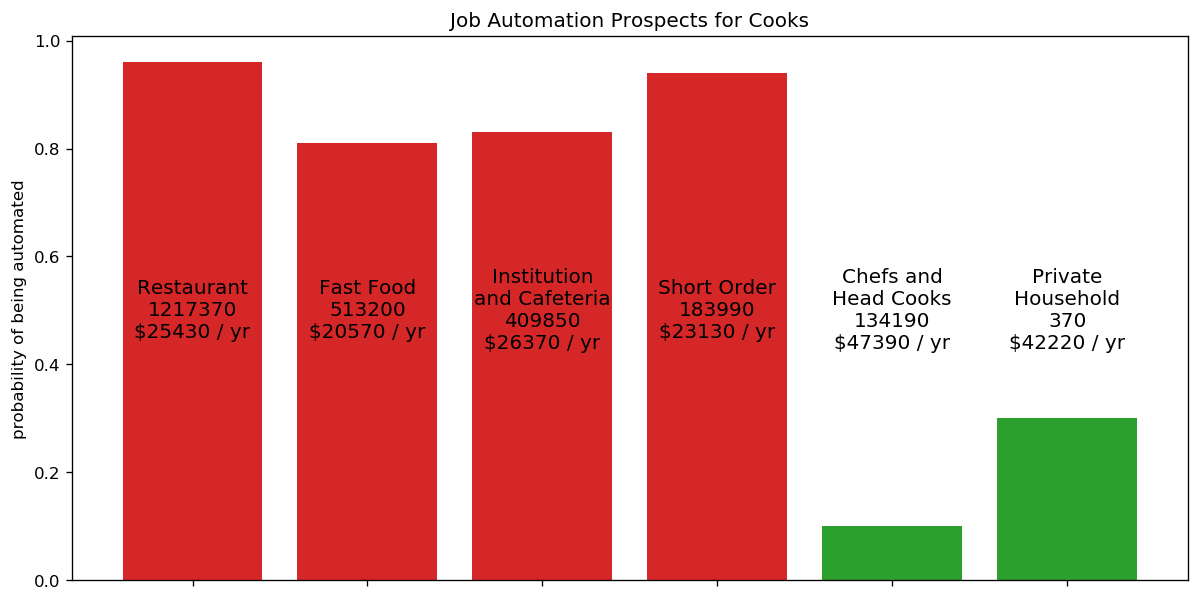

In [10]:
## make a bar chart

ys = cook_dataset.iloc[:10]['prob']
xs = np.arange(len(ys)) ## dummy x values
xlabels = cook_dataset.iloc[:10]['short occupation'].values
for i,(x,y,label) in enumerate(zip(xs,ys,xlabels)):
    color = 'C2' if y < 0.5 else 'C3'
    plt.bar(x,y,color=color,label=label)
    
    
    if 'Cooks, ' in label:
        label = label.split('Cooks, ')[1]
        
    if len(label) > 15:
        label = label.split(' ')
        label = ' '.join(label[:int(len(label)/2)]) + '\n' + ' '.join(label[int(len(label)/2):]) 
    label += '\n%d'%cook_dataset.iloc[i]['numbEmployed']
    label += '\n$%d / yr'%cook_dataset.iloc[i]['average_ann_wage']
    plt.text(x,0.5,label,rotation=0,ha='center',va='center',color='black',fontsize=12)

## set axis labels, etc.
ax = plt.gca()
ax.set_xticks(xs)
ax.set_xticklabels([])
#ax.set_xticklabels(xlabels,rotation=-90)
ax.set_ylabel('probability of being automated')
ax.set_title('Job Automation Prospects for Cooks')
## resize figure for visibility
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.set_dpi(120)

In [11]:
cook_dataset
cook_dataset = cook_dataset.drop(index=445)

In [12]:
import copy

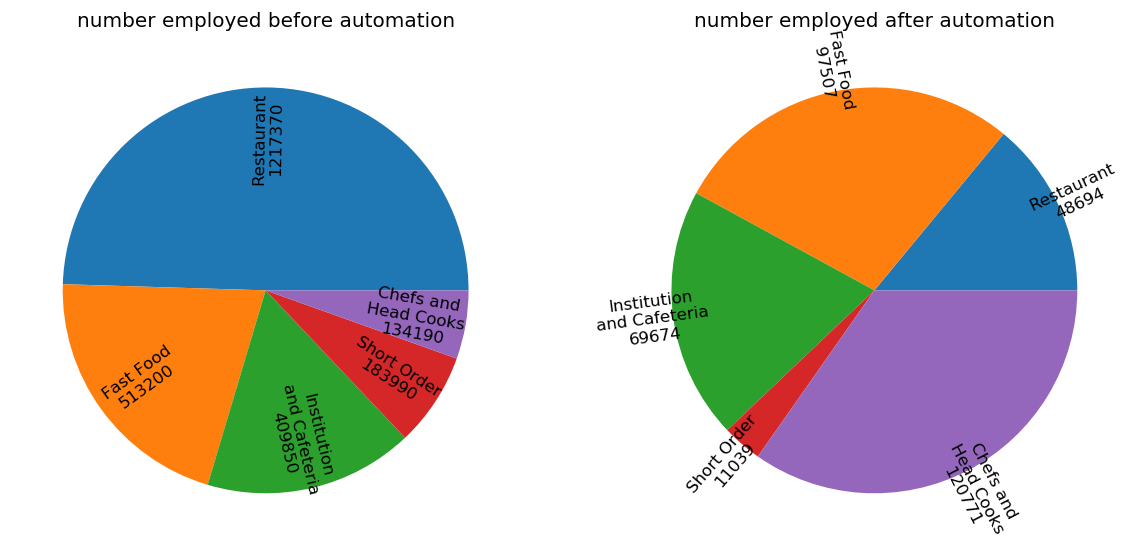

In [13]:
## make a bar chart

fig,axs = plt.subplots(nrows=1,ncols=2)


xlabels = copy.copy(cook_dataset['short occupation'].values)
for i in range(len(xlabels)):
    label = xlabels[i]
    if 'Cooks, ' in label:
        xlabels[i] = label.split('Cooks, ')[1]
    label = xlabels[i]
    if len(label) > 15:
        label = label.split(' ')
        xlabels[i] = ' '.join(label[:int(len(label)/2)]) + '\n' + ' '.join(label[int(len(label)/2):]) 
        
        
ys = cook_dataset['numbEmployed'].values
ax = axs[0]
ax.set_title('number employed before automation')
these_labels = [label+'\n%d'%ys[i] for i,label in enumerate(xlabels)]
ax.pie(ys,labels=these_labels,labeldistance=0.75,rotatelabels=True,
       textprops={'verticalalignment':'center','horizontalalignment':'center'})
ax = axs[1]
## set axis labels, etc.
ys = (cook_dataset['numbEmployed']*(1-cook_dataset['prob'])).values
these_labels = [label+'\n%d'%ys[i] for i,label in enumerate(xlabels)]

ax.pie(ys,labels=these_labels,labeldistance=1.1,rotatelabels=True,
      textprops={'verticalalignment':'center','horizontalalignment':'center'})

#ax.set_xticklabels(xlabels,rotation=-90)

ax.set_title('number employed after automation')
## resize figure for visibility
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.set_dpi(120)
fig.set_facecolor('white')

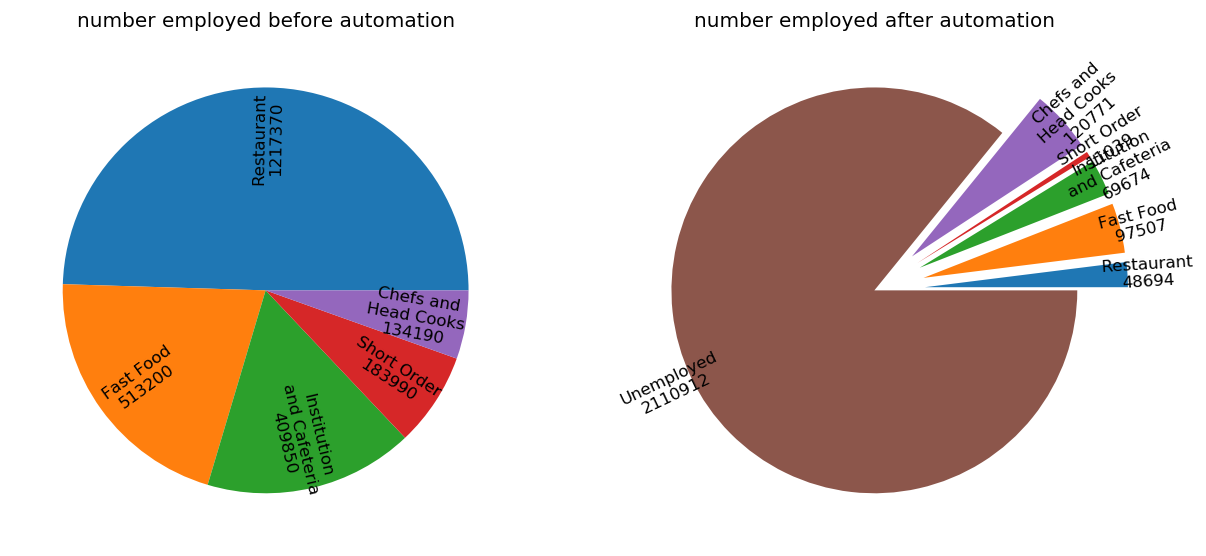

In [14]:
## make a bar chart

fig,axs = plt.subplots(nrows=1,ncols=2)


xlabels = copy.copy(cook_dataset['short occupation'].values)
for i in range(len(xlabels)):
    label = xlabels[i]
    if 'Cooks, ' in label:
        xlabels[i] = label.split('Cooks, ')[1]
    label = xlabels[i]
    if len(label) > 15:
        label = label.split(' ')
        xlabels[i] = ' '.join(label[:int(len(label)/2)]) + '\n' + ' '.join(label[int(len(label)/2):]) 
        
        
ys = cook_dataset['numbEmployed'].values
ax = axs[0]
ax.set_title('number employed before automation')
these_labels = [label+'\n%d'%ys[i] for i,label in enumerate(xlabels)]
ax.pie(ys,labels=these_labels,labeldistance=0.75,rotatelabels=True,
       textprops={'verticalalignment':'center','horizontalalignment':'center'})
ax = axs[1]
## set axis labels, etc.
ys = (cook_dataset['numbEmployed']*(1-cook_dataset['prob'])).values
fired = np.sum(cook_dataset['numbEmployed'].values) - np.sum(ys)
ys = np.append(ys,fired)
these_labels = [label+'\n%d'%ys[i] for i,label in enumerate(xlabels)]
these_labels.append('Unemployed\n%d'%fired)

ax.pie(ys,labels=these_labels,labeldistance=1.1,rotatelabels=True,explode=[0.25]*5+[0],
      textprops={'verticalalignment':'center','horizontalalignment':'center'})

#ax.set_xticklabels(xlabels,rotation=-90)

ax.set_title('number employed after automation')
## resize figure for visibility
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.set_dpi(120)
fig.set_facecolor('white')

In [15]:
from matplotlib.colors import get_named_colors_mapping

In [17]:
from palettable.cartocolors.qualitative import Bold_6

['Restaurant' 'Fast Food' 'Institution\nand Cafeteria' 'Short Order'
 'Chefs and\nHead Cooks']
[1.5555522  3.76687003 4.9463409  5.7051481  6.11171768]


Text(0, 0, '2,110,912 of 2,458,600 jobs are at risk (85%)')

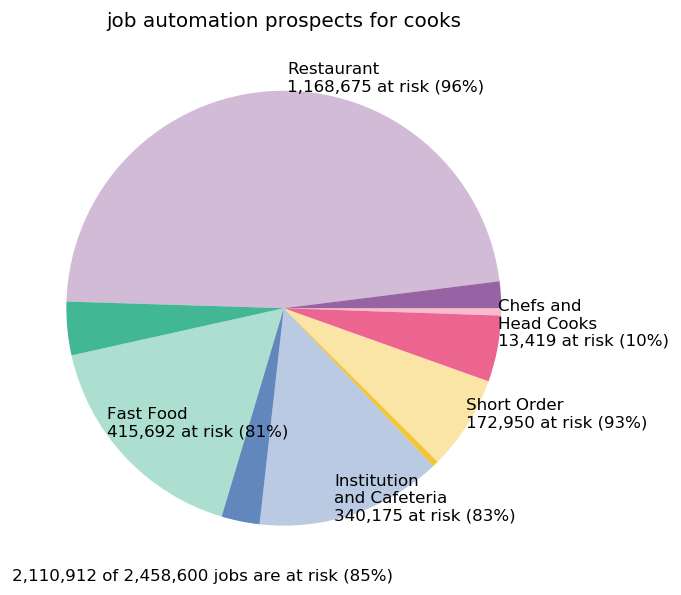

In [18]:
ax = plt.gca()
fig = plt.gcf()

ax.set_title('job automation prospects for cooks')

## set axis labels, etc.
#these_labels = [label+'\n%d'%ys[i] for i,label in enumerate(xlabels)]
n_employed = cook_dataset['numbEmployed'].values
probs = cook_dataset['prob'].values
xlabels = copy.copy(cook_dataset['short occupation'].values)
for i in range(len(xlabels)):
    label = xlabels[i]
    if 'Cooks, ' in label:
        xlabels[i] = label.split('Cooks, ')[1]
    label = xlabels[i]
    if len(label) > 15:
        label = label.split(' ')
        xlabels[i] = ' '.join(label[:int(len(label)/2)]) + '\n' + ' '.join(label[int(len(label)/2):]) 
        
ys = []
colors = []
these_colors = np.array(Bold_6.colors)/255
thetas = [0]
for i,(n,prob) in enumerate(zip(n_employed,probs)):
    ys.append(n*(1-prob))
    ys.append(n*(prob))
    color = these_colors[i]
    colors.append([color[0],color[1],color[2],0.8])
    colors.append([color[0],color[1],color[2],0.35])
    
    thetas.append(360*np.sum(n_employed[:i+1])/np.sum(n_employed))
thetas = np.array(thetas)*np.pi/180
thetas = (thetas[1:]+thetas[:-1])/2
safes,unsafes = ys[::2],ys[1::2]
safe,unsafe = sum(safes),sum(unsafes)

for i in range(len(xlabels)):
    xlabels[i]+= '\n{:,d} at risk ({:d}'.format(int(unsafes[i]),int(100*unsafes[i]/(safes[i]+unsafes[i])))+'%)'

patches,texts = ax.pie(ys,colors=colors,
    labeldistance=1.1,rotatelabels=True,
    textprops={'verticalalignment':'center','horizontalalignment':'center'})

for i,theta in enumerate(thetas):
    x,y = np.cos(theta),np.sin(theta)
    ax.text(x,y,xlabels[i],)#rotation=theta/np.pi*180)

fig.set_size_inches(6,6)
fig.set_dpi(120)
fig.set_facecolor('white')

ax.text(0,0,'{:,d} of {:,d} jobs are at risk'.format(int(unsafe),int(safe+unsafe))+' (%d'%(100*unsafe/(safe+unsafe))+'%)',transform=ax.transAxes)